In [ ]:
import pandas as pd
import numpy as np
Data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
Data.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [ ]:
df = Data.drop(["longitude","latitude","housing_median_age","median_income","median_house_value"],axis=1)
df

,total_rooms,total_bedrooms,population,households
0,5612.0,1283.0,1015.0,472.0
1,7650.0,1901.0,1129.0,463.0
2,720.0,174.0,333.0,117.0
3,1501.0,337.0,515.0,226.0
4,1454.0,326.0,624.0,262.0
...,...,...,...,...
16995,2217.0,394.0,907.0,369.0
16996,2349.0,528.0,1194.0,465.0
16997,2677.0,531.0,1244.0,456.0
16998,2672.0,552.0,1298.0,478.0


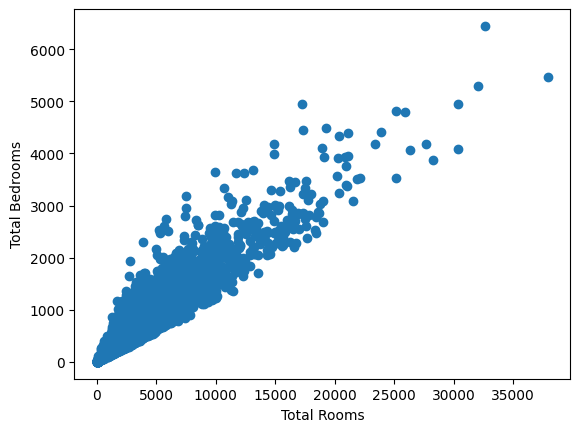

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["total_rooms"],df["total_bedrooms"])
plt.xlabel("Total Rooms")
plt.ylabel("Total Bedrooms")
plt.show()

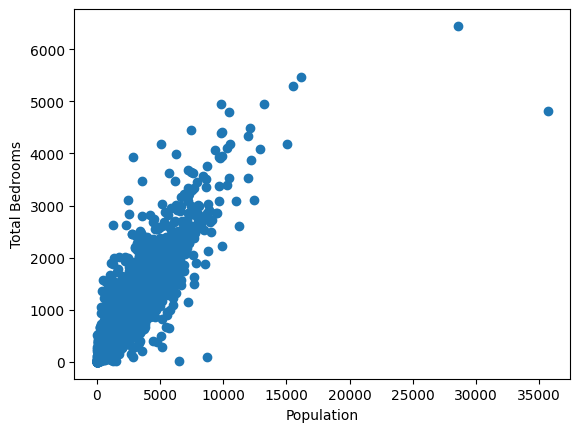

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["population"],df["total_bedrooms"])
plt.xlabel("Population")
plt.ylabel("Total Bedrooms")
plt.show()

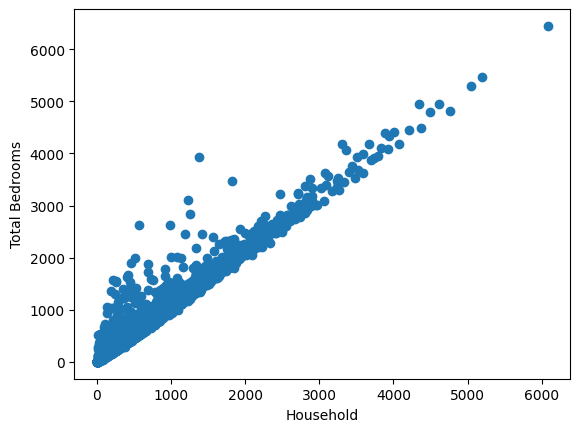

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["households"],df["total_bedrooms"])
plt.xlabel("Household")
plt.ylabel("Total Bedrooms")
plt.show()

In [ ]:
df.shape

(17000, 4)

In [ ]:
X_train = df.drop(["total_bedrooms"],axis=1)
Y_train = df.drop(["total_rooms","population","households"],axis=1)
X_train.shape , Y_train.shape

((17000, 3), (17000, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model_fit = Model.fit(X_train,Y_train)
Model_Predict = Model.predict(X_train)
Model_Predict

array([[631.82986004],
       [693.11956219],
       [130.849378  ],
       ...,
       [502.56126019],
       [522.07260277],
       [304.4499167 ]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(Model_Predict,Y_train), mean_squared_error(Model_Predict,Y_train)

(39.672217650706656, 5650.631822167879)

In [ ]:
df.columns

Index(['total_rooms', 'total_bedrooms', 'population', 'households'], dtype='object')

In [ ]:
df.drop(["total_rooms"],axis=1)

,total_bedrooms,population,households,Prediction_Data,Total Rooms
0,1283.0,1015.0,472.0,631.829860,5612.0
1,1901.0,1129.0,463.0,693.119562,7650.0
2,174.0,333.0,117.0,130.849378,720.0
3,337.0,515.0,226.0,259.462982,1501.0
4,326.0,624.0,262.0,289.315311,1454.0
...,...,...,...,...,...
16995,394.0,907.0,369.0,412.047168,2217.0
16996,528.0,1194.0,465.0,501.086730,2349.0
16997,531.0,1244.0,456.0,502.561260,2677.0
16998,552.0,1298.0,478.0,522.072603,2672.0


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(df["Prediction_Data"],df["total_bedrooms"])

0.9671476240943558

In [ ]:
from sklearn.linear_model import ridge_regression
Redge_df = ridge_regression(X_train,Y_train, alpha=1.0)
Redge_df
from sklearn.metrics import r2_score
r2_score(df["Prediction_Data"],df["total_bedrooms"])

0.9671476240943558